# Mounting Google Drive

1. Create a folder named ``ML`` in your drive

2. Upload the compressed file ``hw8.zip`` into that folder

3. Run the below code snippet and follow the instructions to give access to Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

4. We will change our current directory, so that it is easier to import the necessary files from our drive. To do so, just run the below code cell

In [ ]:
cd drive/MyDrive/ML

5. Now that we are in the desired location, we can unzip the compressed file.

  **Note that this step needs to be done only once**

In [ ]:
!unzip hw4.zip

# Support Vector Machine

Complete the code in `svm.py`. For that first you need to get familiar with one of the following packages for solving convex optimization problems in Python:

* [`cvxopt`](https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf)

* [`cvxpy`](https://www.cvxpy.org/examples/basic/quadratic_program.html)

Note that the comments and hints in the `svm.py` are written for `cvxopt` but you are encouraged to try `cvxpy`, which is more user-friendly.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

from svm import SVM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<ipython-input-5-22b1caaa1ea9>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # Plot style


First let's check it on the toy dataset.

In [6]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data.head()

,x1,x2,y
0,5,2,1
1,6,1,1
2,7,3,1
3,7,5,1
4,8,10,1


**Problem1.** Fit a Hard-margin SVM on the given toy dataset and visualize the decision boundary along with the support vectors marked with stars. Do not forget about encoding the labels ({-1, 1})

In [7]:
data = data.to_numpy()
X = data[:, :-1]
y = data[:, -1]
y[y==0] = -1
y = y.reshape(-1, 1)

In [ ]:
X

In [8]:
model = SVM(C=0)
model.fit(X, y)

In [9]:
model.w @ X.T, model.t

(array([ 3.20132767,  4.40118013,  4.40191775,  3.60250785,  2.40413064,
         6.00221277, -1.59881978, -2.39749205, -0.79793465, -0.79645941,
         0.40339305,  0.40413067]),
 array([1.40413064]))

In [10]:
model.predict(X[4])

array([1.])

In [ ]:
# The graph should look like this

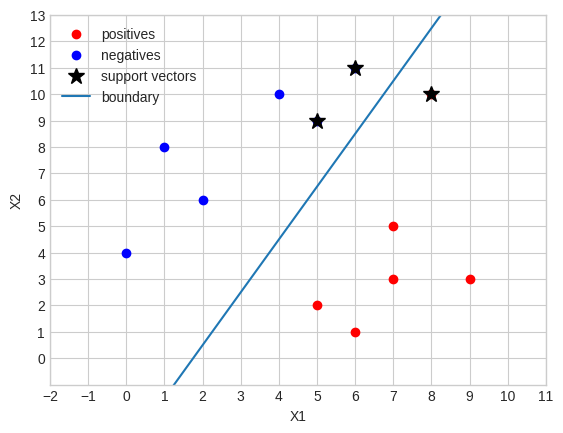

In [11]:
def plot_model(model, X, y):
  # plot the data, the decision boundary and mark support vectors
  plt.plot(X[y==1, 0], X[y==1, 1], "ro", label="positives")
  plt.plot(X[y==-1, 0], X[y==-1, 1], "bo", label="negatives")

  plt.plot(model.support_vectors[:, 0], model.support_vectors[:, 1],
          "*", color="black", markersize=12, label="support vectors")

  xmin, ymin = np.min(X, axis=0)-2
  xmax, ymax = np.max(X, axis=0)+2

  x_ = np.arange(xmin, xmax)
  plt.plot(x_, (model.t - model.w[0] * x_) / model.w[1], label="boundary")

  plt.xlim(xmin, xmax)
  plt.xticks(np.arange(xmin, xmax+1))
  plt.xlabel("X1")

  plt.ylim(ymin, ymax)
  plt.yticks(np.arange(ymin+1, ymax+1))
  plt.ylabel("X2")

  plt.legend(loc = 'upper left')

  plt.show()

plot_model(model, X, y.flatten())

Now let's check the performance of the algorithm on another synthetic dataset without one of the labels.

In [12]:
def synthetic_dataset():
    '''Generate 2 Gaussian samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(100)
    cov1 = np.array([[1, -1],
                     [-1, 2]])

    cov2 = np.array([[0.5, 0.2],
                     [0.2, 0.5]])

    # inputs
    X = np.vstack((np.random.multivariate_normal(mean=[0, 0],
                                                 cov=cov1, size=n),
                   np.random.multivariate_normal(mean=[2.5, 2.5],
                                                 cov=cov2, size=n)
                   ))
    # labels 0, 1
    y = np.hstack((np.zeros(n), np.ones(n)))

    return X, y

Xs, ys = synthetic_dataset()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys,
                                                    test_size=0.25,
                                                    random_state=0)
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

**Problem2.** Fit a Hard-margin SVM (C=None) and report the accuracy on the test set. Visualize the decision boundary and comment on the results you see.

0.4666666666666667


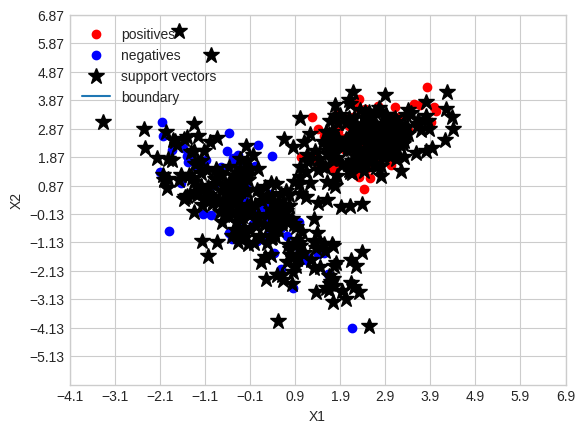

In [15]:
from sklearn.metrics import accuracy_score

model = SVM(C=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))
plot_model(model, X_test, y_test)

**Answer:**

**Problem3.** Now fit 2 Soft-margin SVMs with $C \in \{0.01, 1\}$ and again report the accuracy on the test set. Visualize the decision boundary for both cases and comment on the results you see.

In [16]:
model1 = SVM(C=0.01)
model2 = SVM(C=1)

model1.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

model2.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

print(accuracy_score(y_pred1, y_test))
print(accuracy_score(y_pred2, y_test))

0.4666666666666667
0.4666666666666667


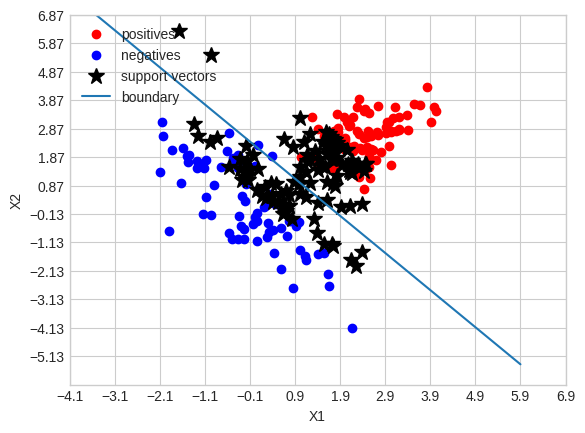

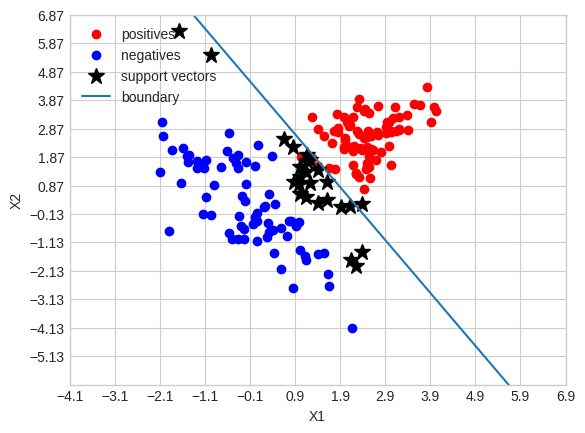

In [17]:
plot_model(model1, X_test, y_test)
plot_model(model2, X_test, y_test)

**Answer:**

## SVM with kernels

**Problem4:** Complete the incomplete parts in `svm_with_kernels.py` script and import the `SupportVectorMachine`. If you have implemented everything correctly then the test accuracy should be 1 in both cases.

**Problem5:** Visualize the decision surfaces (areas in different colors for each class) for both of the above models. We have done a similar thing for KNN algorithm.

In [21]:
# YOUR CODE HERE
def plot_decision_surfaces(model, X, y):
  fig, ax = plt.subplots()

  # plot the data, the decision boundary and mark support vectors
  ax.plot(X[y==1, 0], X[y==1, 1], "ro", label="positives")
  ax.plot(X[y==-1, 0], X[y==-1, 1], "bo", label="negatives")

  ax.plot(model.support_vectors[:, 0], model.support_vectors[:, 1],
          "*", color="black", markersize=12, label="support vectors")

  xmin, ymin = np.min(X, axis=0)-2
  xmax, ymax = np.max(X, axis=0)+2

  xx, yy = np.meshgrid(np.linspace(xmin, xmax+1, 100),
                       np.linspace(ymin, ymax+1, 100))

  grid = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()})

  y_pred = model.predict(grid)
  grid[y_pred == 1].plot(x='x',y='y',kind='scatter',
                               s=20,color='pink', ax=ax)
  grid[y_pred == -1].plot(x='x',y='y',kind='scatter',
                               s=20,color='cyan', ax=ax)

  plt.xlim(xmin, xmax)
  plt.xticks(np.arange(xmin, xmax+1))
  plt.xlabel("X1")

  plt.ylim(ymin, ymax)
  plt.yticks(np.arange(ymin, ymax+1))
  plt.ylabel("X2")

  ax.legend(loc = 'upper left')

  plt.show()

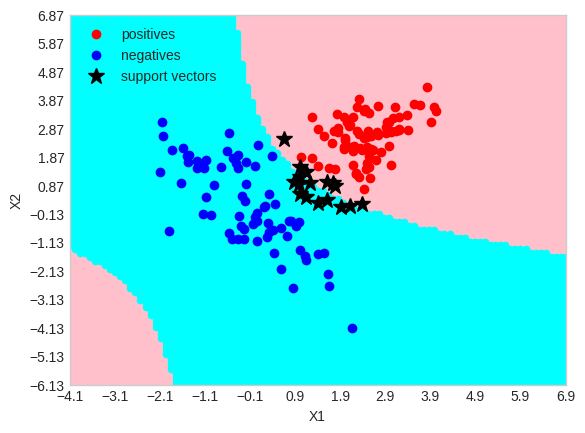

In [22]:
from svm_with_kernels import SupportVectorMachine
model = SupportVectorMachine(kernel_name='poly')
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_score(prediction, y_test)

plot_decision_surfaces(model, X_test, y_test)

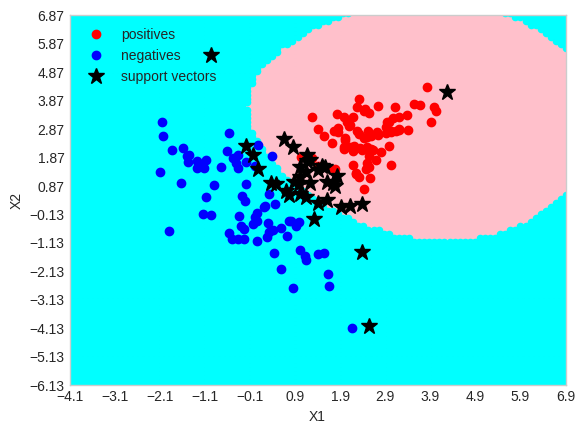

In [26]:
model = SupportVectorMachine(kernel_name='rbf', gamma=0.1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_score(prediction, y_test)

plot_decision_surfaces(model, X_test, y_test)